# MULTIPLE LINEAR REGRESSION

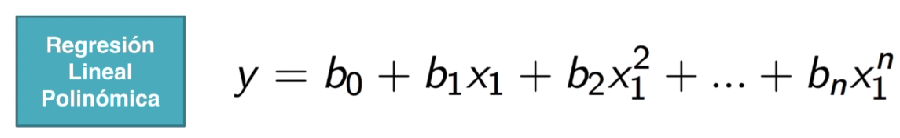

## Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Leer dataset

In [3]:
df = pd.read_csv("C:/Users/Alex/Desktop/R/machine learning/0.dataset/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [18]:
# X = df.drop("Level",axis=1)
X = df.iloc[:, 1:2].values # extrayendo valores como array de np
y = df["Salary"]

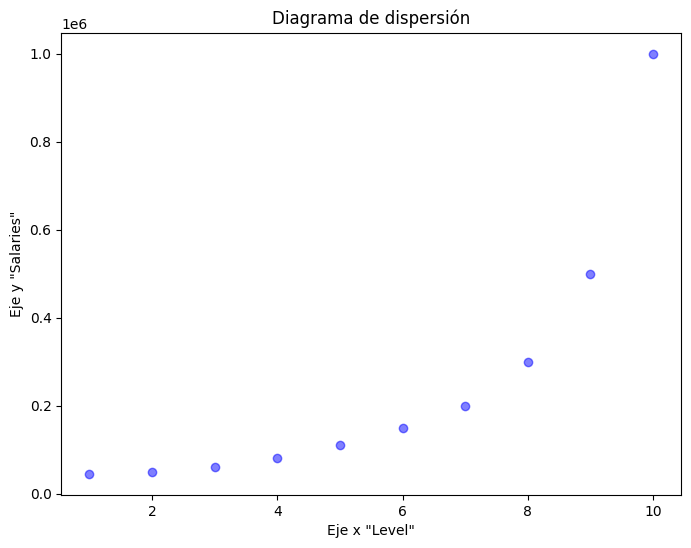

In [22]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color='blue', alpha=0.5)

# Personalizamos el gráfico
ax.set_xlabel('Eje x "Level"')
ax.set_ylabel('Eje y "Salaries"')
ax.set_title('Diagrama de dispersión')

# Mostramos el gráfico
plt.show()

In [17]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
"""

## Escalar los datos

In [44]:
# No es necesario realizar el escalado de las variables en una reg lineal
# from sklearn.preprocessing import StandardScaler
# df_scaler = StandardScaler()
# X_train = df_scaler.fit_transform(X_train)
# X_test = df_scaler.fit_transform(X_test)

## Crear el modelo

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # crear el modelo
model.fit(X, y) # entrenar el modelo

LinearRegression()

In [20]:
## obtener coeficientes del modelo
# Imprimir los coeficientes
print(model.coef_ , '\n')
# Imprimir el intercepto
print(model.intercept_)

[80878.78787879] 

-195333.33333333337


In [23]:
y_pred = model.predict(X)

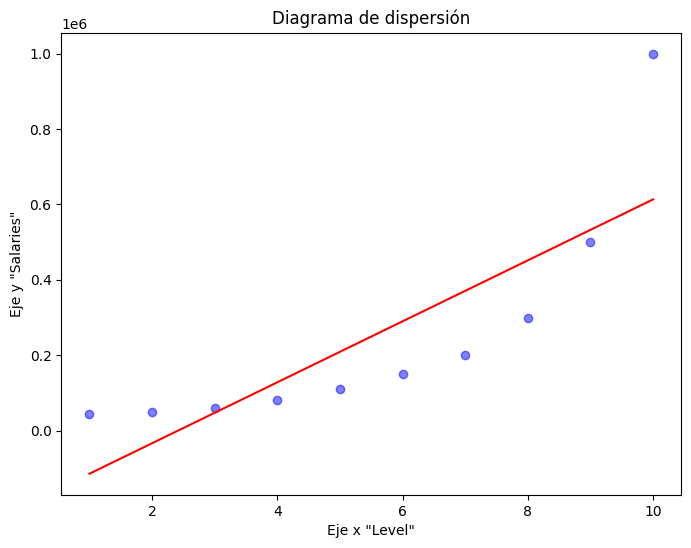

In [25]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color = "red") # graficar la recta de prediccion

# Personalizamos el gráfico
ax.set_xlabel('Eje x "Level"')
ax.set_ylabel('Eje y "Salaries"')
ax.set_title('Diagrama de dispersión')

# Mostramos el gráfico
plt.show()

## Ajustar la regresion polinomica

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(degree=2) # grado 2 o cuadratica
X_poly = poly_model.fit_transform(X) # ajustar
model_2 = LinearRegression()
model_2.fit(X_poly, y)

LinearRegression()

In [28]:
y_pred = model_2.predict(X_poly)

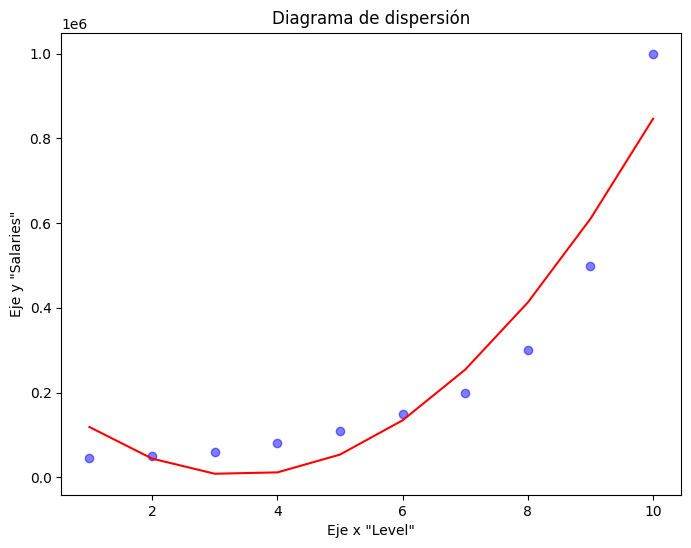

In [34]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X, y, color='blue', alpha=0.5) # graficar los puntos originales
plt.plot(X, y_pred, color = "red") # graficar la recta de prediccion

# Personalizamos el gráfico
ax.set_xlabel('Eje x "Level"')
ax.set_ylabel('Eje y "Salaries"')
ax.set_title('Diagrama de dispersión')

# Mostramos el gráfico
plt.show()

In [33]:
## obtener coeficientes del modelo
# Imprimir los coeficientes
print(model_2.coef_ , '\n')
# Imprimir el intercepto
print(model_2.intercept_)

[      0.         -132871.21212121   19431.81818182] 

232166.6666666664


In [35]:
poly_model = PolynomialFeatures(degree=4) # grado 4 o cuadratica
X_poly = poly_model.fit_transform(X) # ajustar
model_2 = LinearRegression()
model_2.fit(X_poly, y)

LinearRegression()

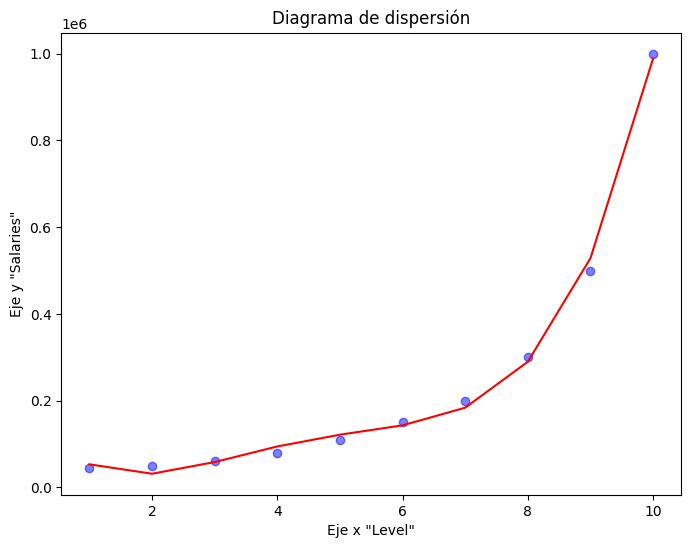

In [36]:
y_pred = model_2.predict(X_poly)

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(X, y, color='blue', alpha=0.5) # graficar los puntos originales
plt.plot(X, y_pred, color = "red") # graficar la recta de prediccion

# Personalizamos el gráfico
ax.set_xlabel('Eje x "Level"')
ax.set_ylabel('Eje y "Salaries"')
ax.set_title('Diagrama de dispersión')

# Mostramos el gráfico
plt.show()

## predecir

In [40]:
model.predict(np.array([6.5]).reshape(-1, 1))

array([330378.78787879])

In [45]:
x_pred = poly_model.fit_transform(np.array([6.5]).reshape(-1, 1))
model_2.predict(x_pred)

array([158862.45265155])

* Se observa que el primer modelo es una regresion lineal el cual no se aproxima a la distribucion de los datos po lo cual si se hace uso de dicho modelo podemos obtener resultados poco realistas.
* Respecto al segundo modelo se ve que el modelo cuadratico tiende a describir mejor la distribucion de los datos y predecir resultados mas acertados.
* El tercer modelo predice tiene un mejor desempeño, donde a medida que se incrementa el grado el modelo tiende a ajustarse mejor a los datos, sin embargo hay que realizar las verificaciones correspondientes para evitar entrar en un sobreajuste.